# Exploratory Data Analysis

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This is a machine learning side project for diabete early dectation established by Huang Lin, Chun. The data is the Diabetes Health Indicators Dataset from kaggle. (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

There are three data files in the dataset, among which the data with balance target was chosen. There are 35346 instances for both diabetes and no diabetes people.

### Data and Functions Definition

#### Import Data and Define Data Labels

In [3]:
data = pd.read_csv('./raw_data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
data_labels = {'Diabetes_binary': 'Diabetes (Binary)',
               'HighBP': 'High Blood Pressure (Binary)',
               'HighChol': 'High Cholesterol (Binary)',
               'CholCheck': 'Cholesterol Check in 5 years',
               'BMI': 'BMI', 'Smoker': 'Smoke or not',
               'Stroke': 'Stroked or not',
               'HeartDiseaseorAttack': 'coronary heart disease (CHD) / myocardial infarction (MI) ',
               'PhysActivity': 'Physical Activity in past 30 days',
               'Fruits': 'Consume Fruit per day',
               'Veggies': 'Consume Vegetables per day',
               'HvyAlcoholConsump': 'Heavy Alcohol Consumption',
               'AnyHealthcare': 'Any Healthcare Coverage', 
               'NoDocbcCost': 'Not going to hospital due to cost',
               'GenHlth': 'General Health Self Evaluation',
               'MentHlth': 'Poor Mental Health Days (past 1 mth)',
               'PhysHlth': 'Physical illness / injury days (past 1 mth)',
               'DiffWalk': 'Difficulty walking or climbing stairs',
               'Sex': 'Gender (1 = male)', 'Age': '13-level age category',
               'Education': 'Education level scale 1-6',
               'Income': 'Income scale 1-8'}
# (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
# (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
# 1 = Never attended school or only kindergarten 2 = elementary etc.

In [4]:
print(f'Number of instances when target = 1 (Diabetes): {len(data[data["Diabetes_binary"] == 1])}')
print(f'Number of instances when target = 0 (No Diabetes): {len(data[data["Diabetes_binary"] == 0])}')

Number of instances when target = 1 (Diabetes): 35346
Number of instances when target = 0 (No Diabetes): 35346


#### Define Plotting Functions for Non-binary Features

In [5]:
from matplotlib import rc
def densityCont(data, ax, var, bins, addition = None,
                legend_kwgs = {'fontsize': 14, 'frameon': False},
                title_kwgs = {'fontsize': 20}):
    # Stacked Bar Plots 
    sns.histplot(data[var][data['Diabetes_binary'] == 1], 
             bins = bins, alpha = 0.4, ax = ax, label = 'Diabetes')
    sns.histplot(data[var][data['Diabetes_binary'] == 0], 
                bins = bins, alpha = 0.4, ax = ax, label = 'No Diabetes')
    ax.set_xlabel(f'{data_labels[var]}')

    # Aggregate Kernel Density
    ax_kde = ax.twinx()
    ax_kde.grid(False)
    sns.kdeplot(data[var], ax = ax_kde, bw_adjust = 4.5, 
                color = 'mediumseagreen', label = 'Aggregate kernel density')
    
    # Mean and Medium Vertical Line
    ax.axvline(x = data[var].mean(), color = 'dimgray', label = 'Mean Value', linestyle = '-.', linewidth = 2)
    ax.axvline(x = data[var].median(), color = 'black', label = 'Median Value', linestyle = ':', linewidth = 2)

    # Combine the labels for histogram and kernel function to create the legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax_kde.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc=0, 
              fontsize = legend_kwgs['fontsize'], frameon = legend_kwgs['frameon'])
    skew = round(data[var].skew(), 3)
    variance = round(data[var].var(), 3)

    # Set Subplot Title
    if addition == None:
        ax.set_title(f'{var}, $skew = {skew}, \sigma^2 = {variance}$', 
                 fontsize = title_kwgs['fontsize'])
    else:
        ax.set_title(f'{var} {addition}, $skew = {skew}, \sigma^2 = {variance}$', 
                 fontsize = title_kwgs['fontsize'])

    ax.tick_params(axis='both', colors='dimgray', labelsize = 12)


### Null Value Analysis

In [6]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

It is a cleaned data. All null values have been removed in advance.

### Outlier Analysis for BMI

Among all features, Body Mass Index (BMI) has the highest likelihood of containing outliers. (Other features are either binary or ordinal variables.)

We define the outliers by z-score of instances within the sample distribution. An instance is considered outlier if the absolute value of its Z-score is larger than three (the probability of being observed is under 0.3%). In order to increase the stability of the estimation, we eliminate the outliers.

In [7]:
data['BMI'].max()

98.0

(I was shocked by the fact that there actually exist people with BMI 98!)

Number of instances before BMI outlier removal: 70692
Number of instances after BMI outlier removal: 69891
Number of outliers removed: 801


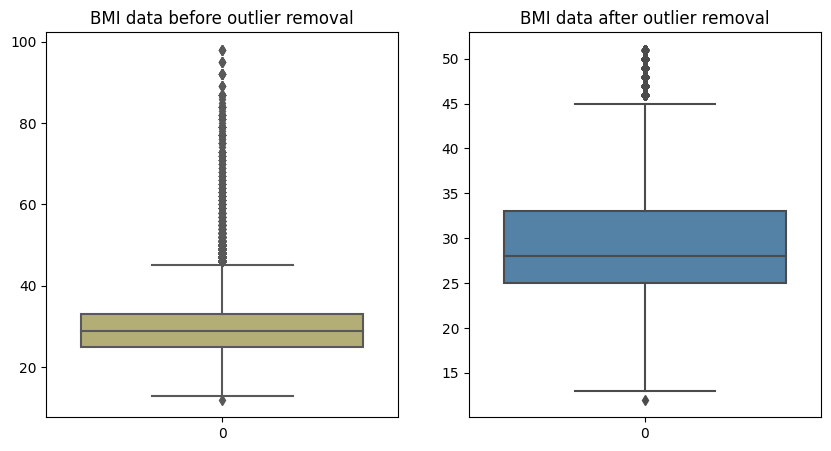

In [8]:
from scipy.stats import zscore
zscores = zscore(data['BMI'])

# Identifying Outliers with Z-scores.
# Eliminate outliers if Z-scores > 3 (larger or smaller than 3 standard deviation)
threshold = 3
BMI_outliers = data['BMI'][np.abs(zscores) > threshold].index
data_cleaned = data.drop(BMI_outliers)

# plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
sns.boxplot(data['BMI'], ax = ax1, color = 'darkkhaki')
ax1.set_title('BMI data before outlier removal', fontsize = 12);
sns.boxplot(data_cleaned['BMI'], ax = ax2, color = 'steelblue')
ax2.set_title('BMI data after outlier removal', fontsize = 12);

print(f'Number of instances before BMI outlier removal: {len(data)}')
print(f'Number of instances after BMI outlier removal: {len(data_cleaned)}')
print(f'Number of outliers removed: {len(data) - len(data_cleaned)}')

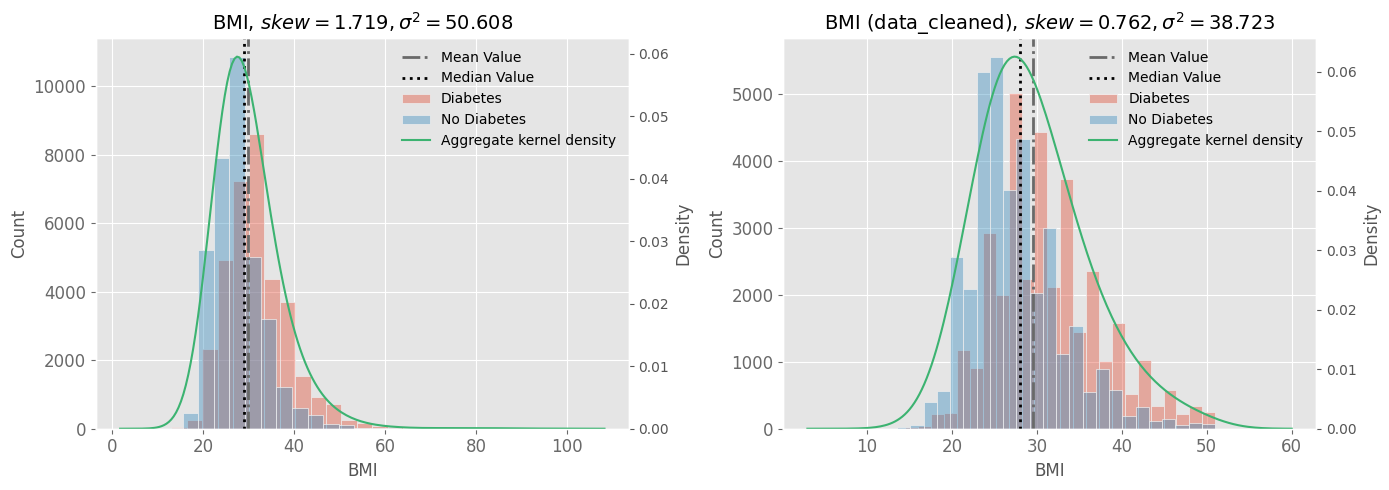

In [9]:
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5));
densityCont(data, ax1, 'BMI', bins = 25, 
            legend_kwgs = {'fontsize': 10, 'frameon': False}, 
            title_kwgs = {'fontsize': 14});
densityCont(data_cleaned, ax2, 'BMI', bins = 25, 
            legend_kwgs = {'fontsize': 10, 'frameon': False}, 
            title_kwgs = {'fontsize': 14},
            addition = '(data_cleaned)');
fig.tight_layout();

In [10]:
# Set data_cleaned as data
data = data_cleaned.copy()

### Binary Features and Target

Among all features, 15 take binary value. We analyse the distribution by stacked bar plots and rendering them with different colors conditioned on the target value. In addition, binary features with sample variance lower than 0.09 would be highlighed with color green. 

If we view the binary features as bernoulli distribution, the variance can be calculated by the formula
 $$\hat{\sigma}^2 = P(x=1) \times P(x = 0)$$

Therefore, variance lower than 0.09 indicates that one value takes proportion over 0.9 and thus extremely unbalanced.

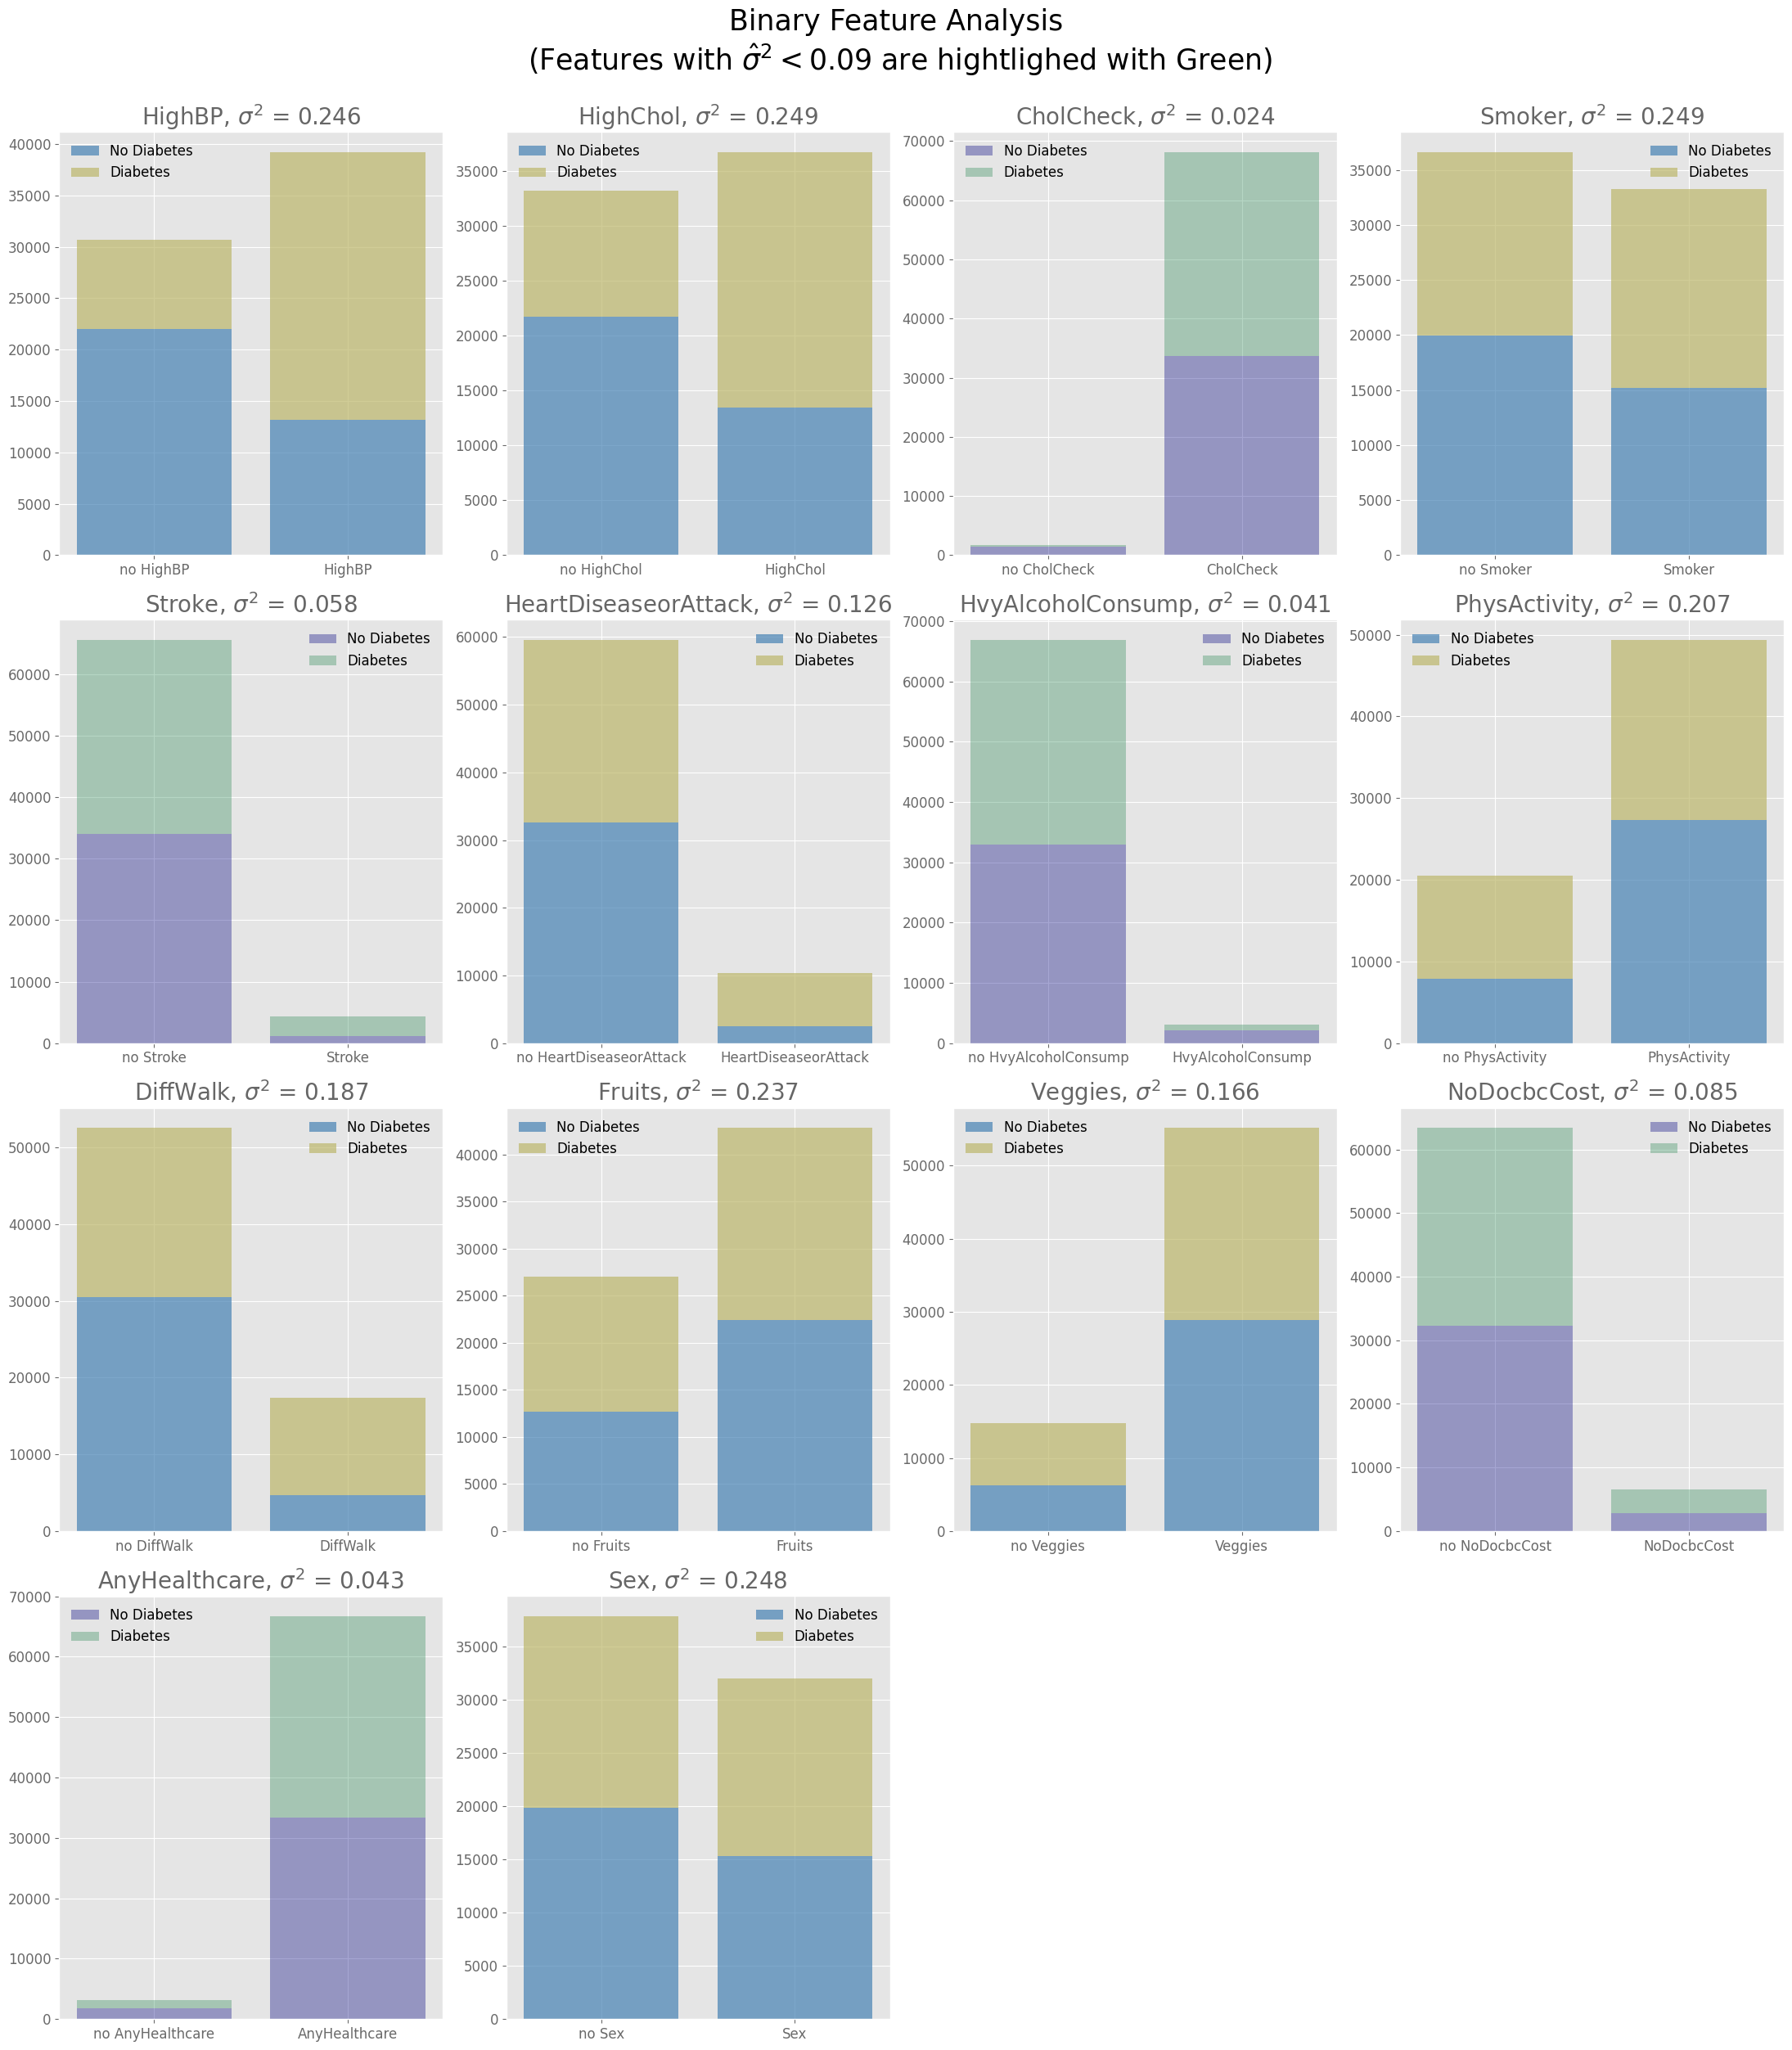

In [11]:
plt.style.use('ggplot')
######################################
#### Create Aggregate Data for Barplot
######################################
binary_vars = ['Diabetes_binary','HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
               'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk',
               'Fruits', 'Veggies', 'NoDocbcCost', 'AnyHealthcare', 'Sex']

# binary_features_true <- number of instances where feature == 1 for each features
binary_features_true = data[binary_vars]

# binary_features_false <- number of instances where feature == 0 for each features
binary_features_false = binary_features_true.copy()
for col in binary_features_false.columns[1:]:
    binary_features_false[col] = binary_features_false[col].apply(lambda x: 1 if x == 0 else 0)

binary_features_true = binary_features_true.groupby('Diabetes_binary').sum().astype(int)
binary_features_false = binary_features_false.groupby('Diabetes_binary').sum().astype(int)

######################################
#### Define Plot Function
######################################
def barBinary(ax, var, colors = ['steelblue', 'darkkhaki'], alpha = 0.6):
    value_1 = [binary_features_false[var].iloc[0], binary_features_true[var].iloc[0]]
    value_2 = [binary_features_false[var].iloc[1], binary_features_true[var].iloc[1]]
    label = [f'no {var}', f'{var}']  

    # Function that checks if the variance of the feature is large enough
    # We use different colors to stress out features that are not balanced (var < .9 * (1 - .9))
    def featureVarianceChecker(alpha, colors):
        d = [value_1[0]+value_2[0], value_1[1]+value_2[1]]
        if (d[0]/sum(d))*(d[1]/sum(d)) < .9 * (1 - .9):
            alpha = alpha * 0.5
            colors = ['navy', 'seagreen']
        return alpha, colors
    alpha, colors = featureVarianceChecker(alpha, colors)

    # Plotting
    bar1 = ax.bar(label, value_1, label = 'No Diabetes', 
                  color = colors[0], alpha = alpha)
    bar2 = ax.bar(label, value_2, bottom = value_1, label = 'Diabetes',
                  color = colors[1], alpha = alpha)

    ax.set_title(f'{var}, $\sigma^2$ = {round(data[var].var(), 3)}', fontsize = 20, alpha = 0.6)
    ax.tick_params(axis='both', colors='dimgray', labelsize = 12)
    ax.legend(frameon = False, fontsize = 12)

######################################
#### Visualization
######################################
fig, ((ax1, ax2, ax3, ax4), 
      (ax5, ax6, ax7, ax8),
      (ax9, ax10, ax11, ax12),
      (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, squeeze = False, figsize = (22,25))
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14]

for ax, var in zip(axs, binary_vars[1:]):
    barBinary(ax, var, alpha = 0.7)
for ax in [ax15, ax16]:
    ax.axis('off')
fig.suptitle('Binary Feature Analysis\n (Features with $\hat{\sigma}^2 < 0.09$ are hightlighed with Green)',
              fontsize = 25, y = 1);
fig.tight_layout()

### Non-binary Feature and Target

We then conduct other seven non-binary features by the histograms of occurances conditioned on target value and the unconditioned aggregate kernel density estimate curve. We also render the mean and median value on the visual to show the skewness of features.

In [12]:
from matplotlib import rc
def densityCont(data, ax, var, bins, 
                legend_kwgs = {'fontsize': 14, 'frameon': False},
                title_kwgs = {'fontsize': 20}):
    # Stacked Bar Plots 
    sns.histplot(data[var][data['Diabetes_binary'] == 1], 
             bins = bins, alpha = 0.4, ax = ax, label = 'Diabetes')
    sns.histplot(data[var][data['Diabetes_binary'] == 0], 
                bins = bins, alpha = 0.4, ax = ax, label = 'No Diabetes')
    ax.set_xlabel(f'{data_labels[var]}')

    # Aggregate Kernel Density
    ax_kde = ax.twinx()
    ax_kde.grid(False)
    sns.kdeplot(data[var], ax = ax_kde, bw_adjust = 4.5, 
                color = 'mediumseagreen', label = 'Aggregate kernel density')
    
    # Mean and Medium Vertical Line
    ax.axvline(x = data[var].mean(), color = 'dimgray', label = 'Mean Value', linestyle = '-.', linewidth = 2)
    ax.axvline(x = data[var].median(), color = 'black', label = 'Median Value', linestyle = ':', linewidth = 2)

    # Combine the labels for histogram and kernel function to create the legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax_kde.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc=0, 
              fontsize = legend_kwgs['fontsize'], frameon = legend_kwgs['frameon'])
    skew = round(data[var].skew(), 3)
    variance = round(data[var].var(), 3)
    ax.set_title(f'{var}, $skew = {skew}, \sigma^2 = {variance}$', 
                 fontsize = title_kwgs['fontsize'])
    ax.tick_params(axis='both', colors='dimgray', labelsize = 12)
    



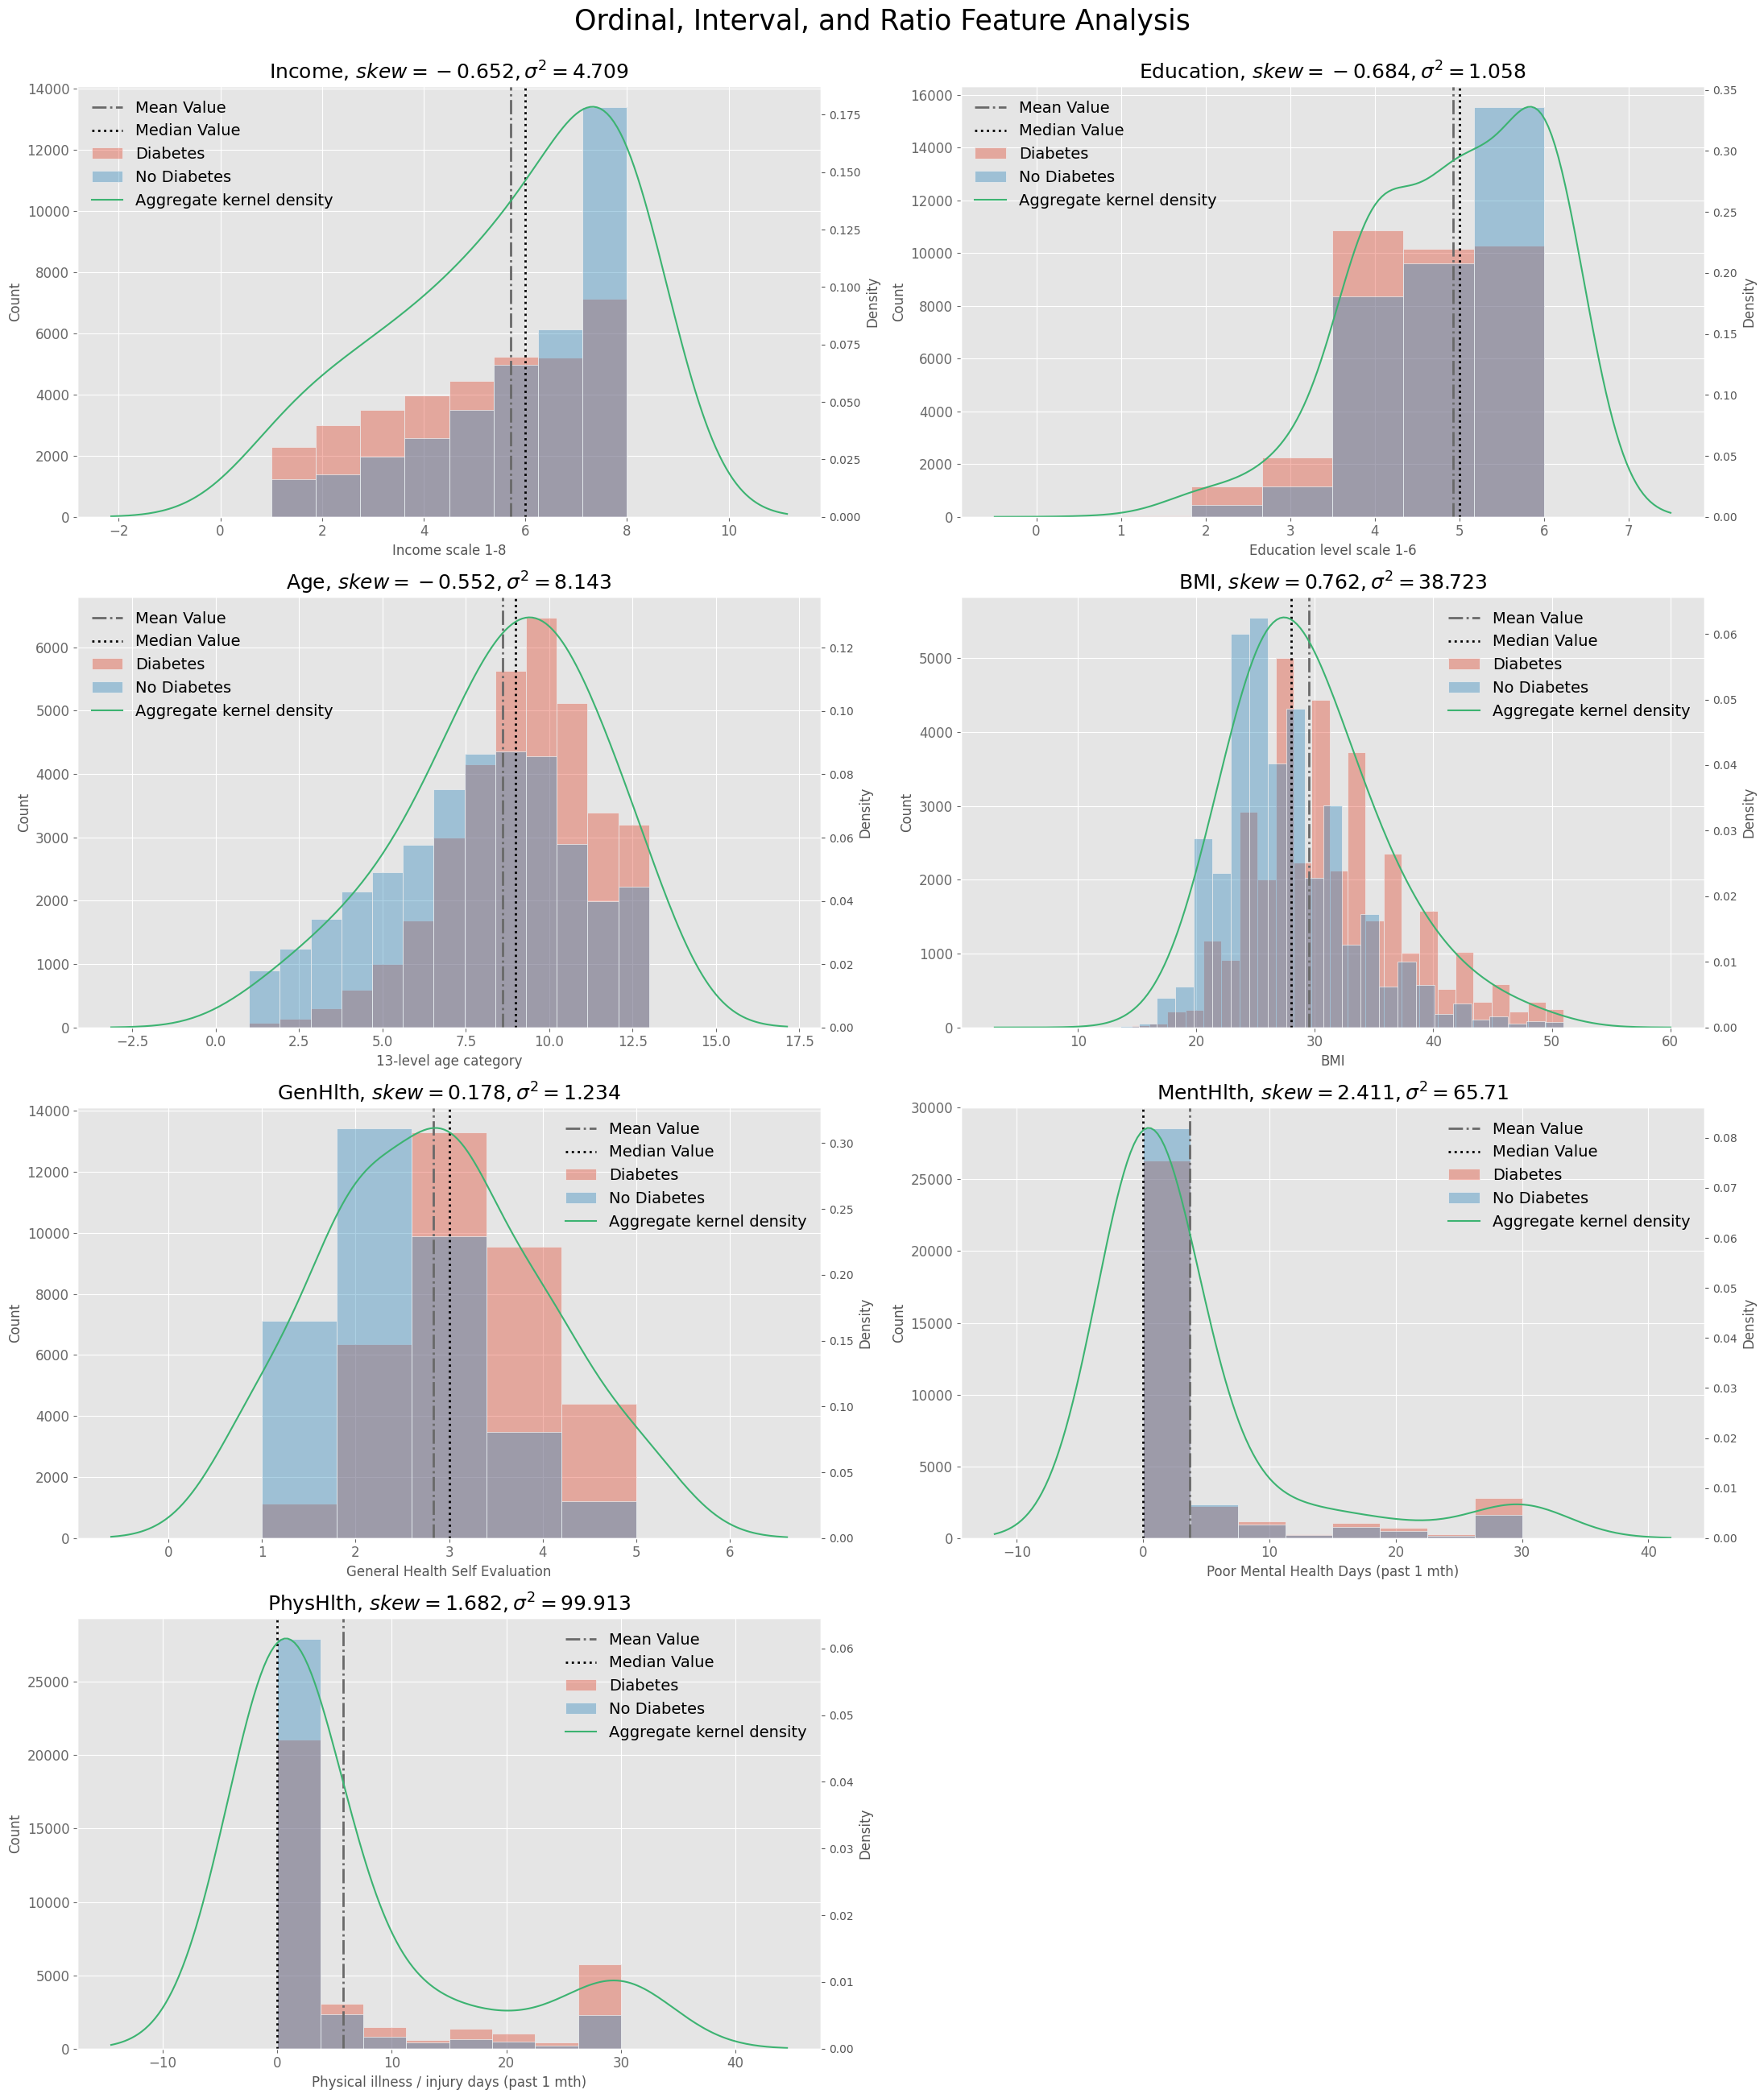

In [13]:
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize = (22, 26));
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
vars = ['Income', 'Education', 'Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
bins = [8, 6, 13, 25, 5, 8, 8]

for ax, var, bin in zip(axs, vars, bins):
    densityCont(data, ax, var, bins = bin, title_kwgs = {'fontsize': 18})

ax8.axis('off');
fig.suptitle('Ordinal, Interval, and Ratio Feature Analysis', fontsize = 25, y = 1);
fig.tight_layout()

### Correlation Analysis

Furthermore, correlation analysis is conducted using Heat Map. The target "Diabetes_binary" is also included. 


According to the Heat Map, there are basically no features that are highly correlated with each other, 
except between "General Health" and "Physical Health", and between "Income" and "Education".



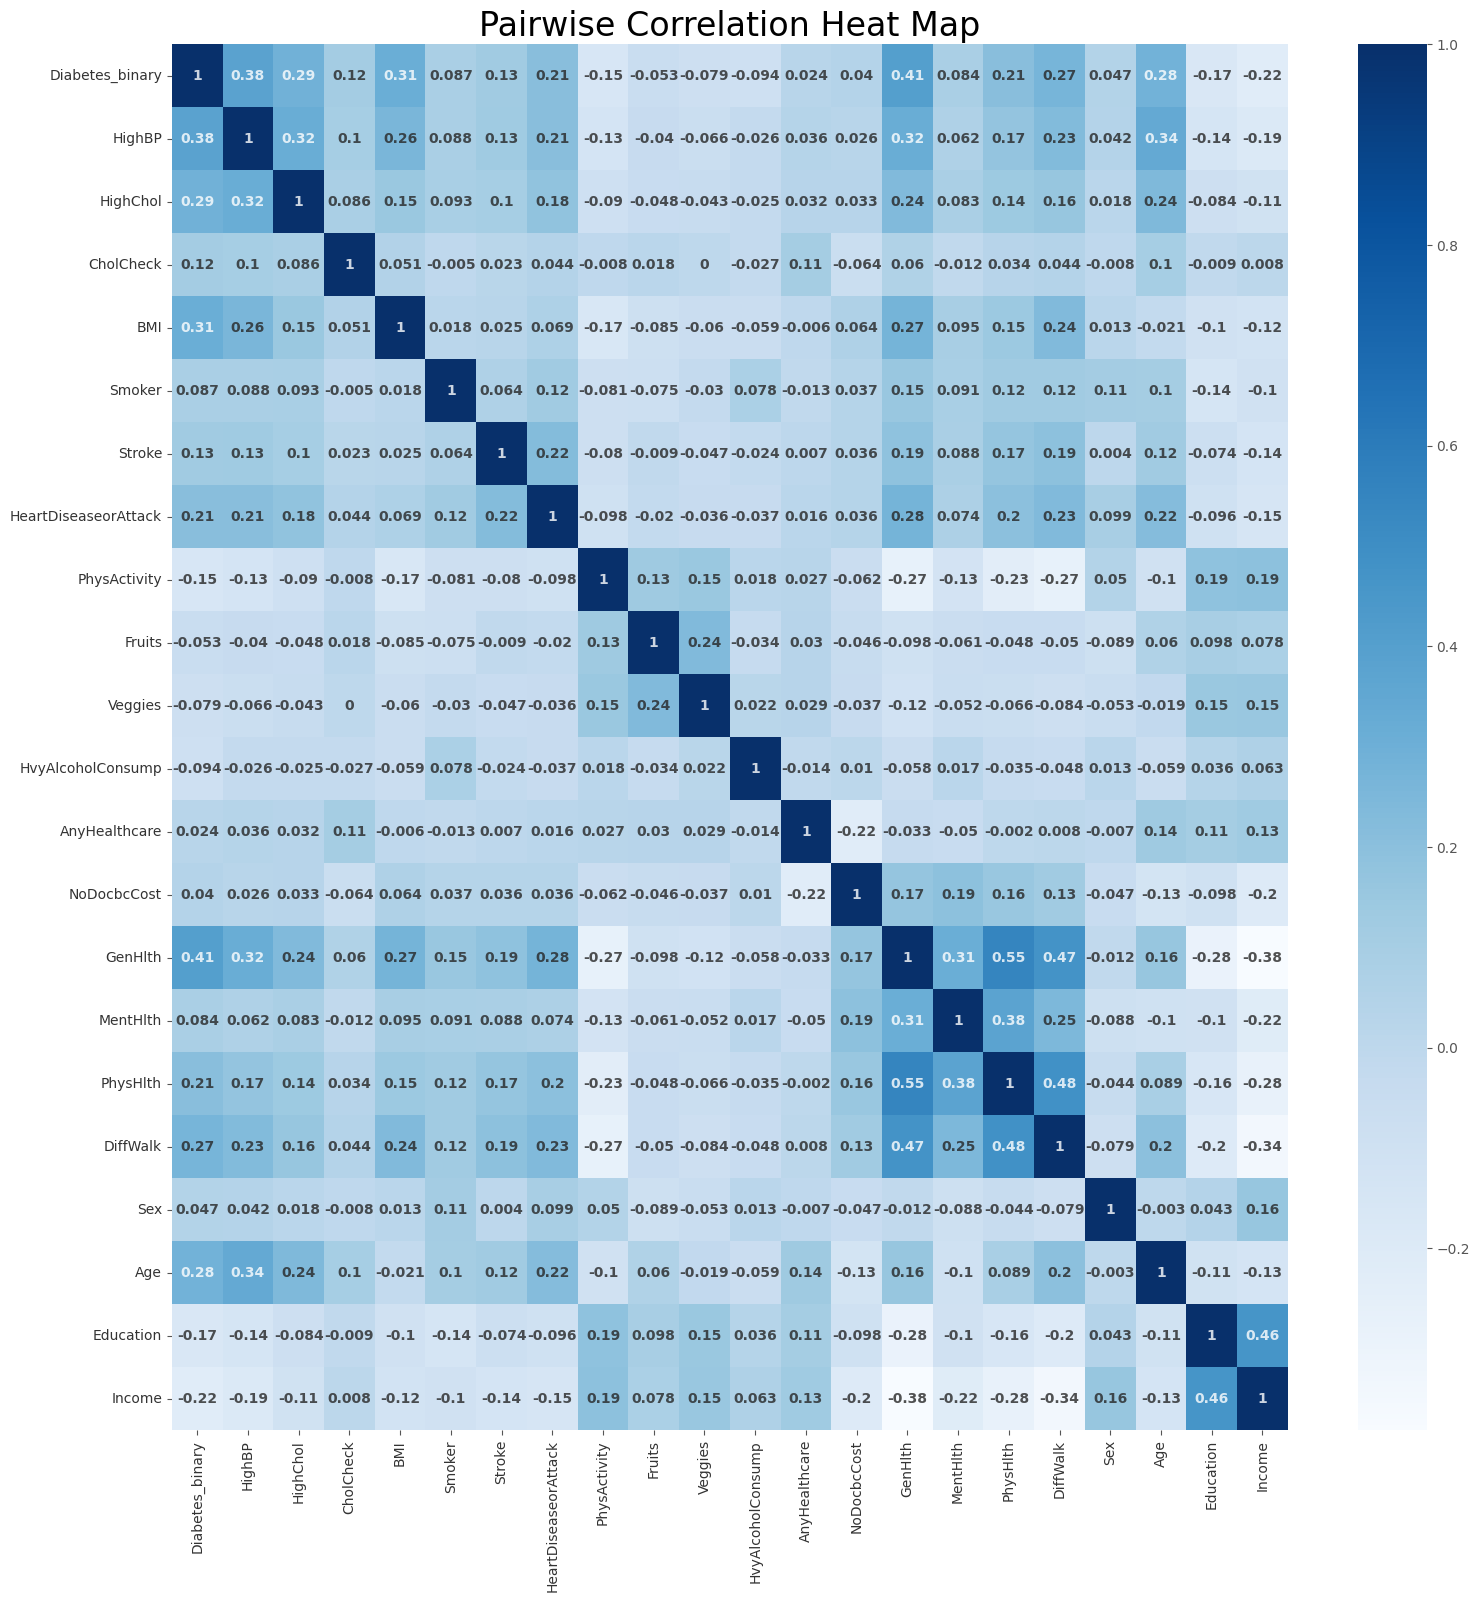

In [14]:
corr = round(data.corr(), 3)
fig, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(corr, annot = True, cmap = sns.color_palette("Blues", as_cmap=True),
            annot_kws = {'fontsize': 10, 'fontweight': 'semibold', 'alpha': 0.8})
ax.set_xticklabels(corr.columns, color = 'black', alpha = 0.8);
ax.set_yticklabels(corr.columns, color = 'black', alpha = 0.8);
ax.set_title('Pairwise Correlation Heat Map', fontsize = 24);

explanation = '''
According to the Heat Map, there are basically no features that are highly correlated with each other, 
except between "General Health" and "Physical Health", and between "Income" and "Education".
'''

print(explanation)

### Feature Selection

#### Feature Importance and Correlation Analysis

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_importance = RandomForestClassifier(random_state = 2)

X = data_cleaned.iloc[:, 1:]
y = data_cleaned.iloc[:, 0]
rf_importance.fit(X, y);


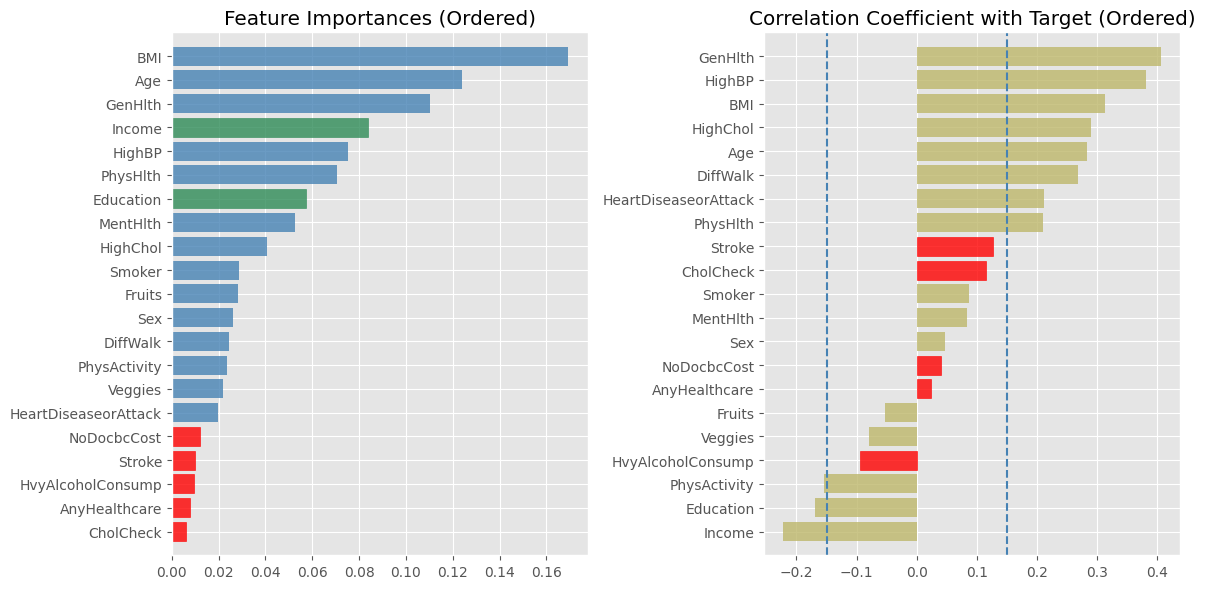

In [16]:
# Plot Feature Importances
importances = pd.Series(rf_importance.feature_importances_, index = X.columns).sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
barlist = ax1.barh(width = importances, y = importances.index, color = 'steelblue', alpha = 0.8)
low_vars_importances = [0, 1, 2, 3, 4]
educ_income = [14, 17]
ax1.set_ylim(-1,21)
ax1.set_title('Feature Importances (Ordered)')
for i in low_vars_importances:
    barlist[i].set_color('red')
for i in educ_income:
    barlist[i].set_color('seagreen')

# Plot Feature's Correlation Coefficient with Target
corr_target = (corr['Diabetes_binary']).sort_values().drop('Diabetes_binary')
corrbars = ax2.barh(width = corr_target, y = corr_target.index, color = 'darkkhaki', alpha = 0.8)
ax2.set_ylim(-1,21)
ax2.axvline(x = 0.15, color = 'steelblue', linestyle = '--')
ax2.axvline(x = -0.15, color = 'steelblue', linestyle = '--')
ax2.set_title('Correlation Coefficient with Target (Ordered)')
low_vars_corr_target = [3, 6, 7, 11, 12]
for i in low_vars_corr_target:
    corrbars[i].set_color('red')
fig.tight_layout()


1. Despite the high correlation between General Health and Physical Health (according to the pair wise correlation plot), we decide to include both of them, as we think that these two features measure health in different angles. General Health was evaluated by 
individual subjective feeling, which Physical Health measured the objective health by calculating the actual
days of physical injury or illness. Therefore, we include both to take into account different aspects of health.

2. On the other hand, we decided to **eliminate both income and education** from our model, as these two variables lack direct causal predictability on diabetes and are deemed "confounder" of the model.
   
3. Four features, **NoDocbcCost, HvyAlcoholConsump, AnyHealthcare, CholCheck**, have low variance, low feature importances, and low correlation with target. In addition, these four features are more like behavioral variables that seem to not have direct predictability to diabete. Therefore, we decided to eliminate them from our model.
   
4. We did not drop **stroke** feature despite the low feature importance, because we think stroke is still a strong indicator of health condition and it still correlates with our target (|corr = 0.12|), even not much. If we rule it out, the model performance might drop further. 

## Model Selection & Validation

We then trained four models based on the selected features. Four models selected are:
1. Random Forest:

   We choose it because of its versatility. It could be well fitted for both classification and regression model and adjusted elasticly.

2. Logistic Regression:

   It is efficient, and it does not require feature scaling.

3. XGBoost:
   
   Same as the reason for Random Forest. In addition, this model is proven well-behaved for large scope of applications.

4. Neural Network:

   It sounds cool and verstile, despite the lack of interpretability.

In [17]:
# X = X.drop(['CholCheck'], axis = 1)

X = data_cleaned.iloc[:, 1:]
y = data_cleaned.iloc[:, 0]

X = X.drop(['Education', 'Income', 'CholCheck', 'NoDocbcCost', 'AnyHealthcare',
             'HvyAlcoholConsump'], axis = 1)

#### Train_test_split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay



#### Cross Validation for Four Models

Cross Validation is conducted for the four models. Only Neural Network's hyper parameters are modified.

We consider four metrics to evaluate the models:

1. Precision 
   
2. Recall (True Positive Rate):

    Because Diabetes Detection is health problem, the impact of not being diagnosed is deemed more serious. Therefore, in order to minimize the false negative rate, we select recall as the primary evaluation metric.

3. F1 macro:

    We want to obtain high recall with least sacrifice of precision, so we also introduce F1 as the evaluation metric. We choose F1 macro as we want to weight smaller categories more (although the target is balanced.)

4. Area under ROC curve (ROC_AUC)

    Model with high ROC_AUC implies it could increase the recall with the least sacrifice of false positive rate.

In [20]:
clf_rf = RandomForestClassifier(random_state=22)
clf_logistic = LogisticRegression(max_iter = 1500)
clf_GBDT = GradientBoostingClassifier(random_state=0)
clf_NN = MLPClassifier(random_state = 2, alpha=1e-05)
models = [clf_rf, clf_logistic, clf_GBDT, clf_NN]
model_name = ['Random Forest Classifier', 'Logistic Regression', 'XGBoost (GBDT)', 'Neural Network']

In [21]:
scoring = ['precision', 'recall', 'f1_macro', 'roc_auc']
cross_val_df = pd.DataFrame(columns = scoring)
for model, name in zip(models, model_name):
    scoring = ['precision', 'recall', 'f1_macro', 'roc_auc']
    cross_val_dict = cross_validate(estimator = model, 
                                       X = X_train, y = y_train, 
                                       scoring = scoring)
    cross_val_df.loc[name, 'precision'] = cross_val_dict['test_precision'].mean()
    cross_val_df.loc[name, 'recall'] = cross_val_dict['test_recall'].mean()
    cross_val_df.loc[name, 'f1_macro'] = cross_val_dict['test_f1_macro'].mean()
    cross_val_df.loc[name, 'roc_auc'] = cross_val_dict['test_roc_auc'].mean()
    print(f'{name} trained')

Random Forest Classifier trained
Logistic Regression trained
XGBoost (GBDT) trained
Neural Network trained


In [22]:
print('   Model Comparisons based on 5 fold Cross Validation Scoring')
print('----------------------------------------------------------------')
print(cross_val_df)

   Model Comparisons based on 5 fold Cross Validation Scoring
----------------------------------------------------------------
                         precision    recall  f1_macro   roc_auc
Random Forest Classifier  0.707228  0.754944  0.722935  0.790553
Logistic Regression       0.733449  0.761428  0.744071  0.821454
XGBoost (GBDT)            0.727366  0.788696  0.747969  0.826001
Neural Network            0.732284  0.769098  0.743483  0.824334


According to the cross validated score reports, XGBoost (GBDT) seems to have the best performance among all models.

#### Precision-Recall Curve & ROC Curve for Four Models

We further analyze model performance by Precision-Recall Curve and ROC Curve.

In [23]:
from sklearn.metrics import precision_recall_curve, roc_curve
def valsPrecisionRecallCurve(model):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob[:,1])
    return precisions, recalls
def plotPrecisionRecallCurve(precisions, recalls, label, ax, color):
    ax.plot(precisions, recalls, label = f'{label}', color = color)
    ax.set_xlabel('Precision')
    ax.set_ylabel('Recall')

def valsROCCurve(model):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
    return fpr, tpr
def plotROCCurve(fpr, tpr, label, ax, color):
    ax.plot(fpr, tpr, label = f'{label}', color = color)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

Get Precision - Recall Curve Data

In [24]:
prc_dict = {}
for model, name in zip(models, model_name):
    precisions, recalls = valsPrecisionRecallCurve(model)
    prc_dict[name] = (precisions, recalls)

Get ROC Curve Data

In [25]:
roc_dict = {}
for model, name in zip(models, model_name):
    fpr, tpr = valsROCCurve(model)
    roc_dict[name] = (fpr, tpr)

Visualization

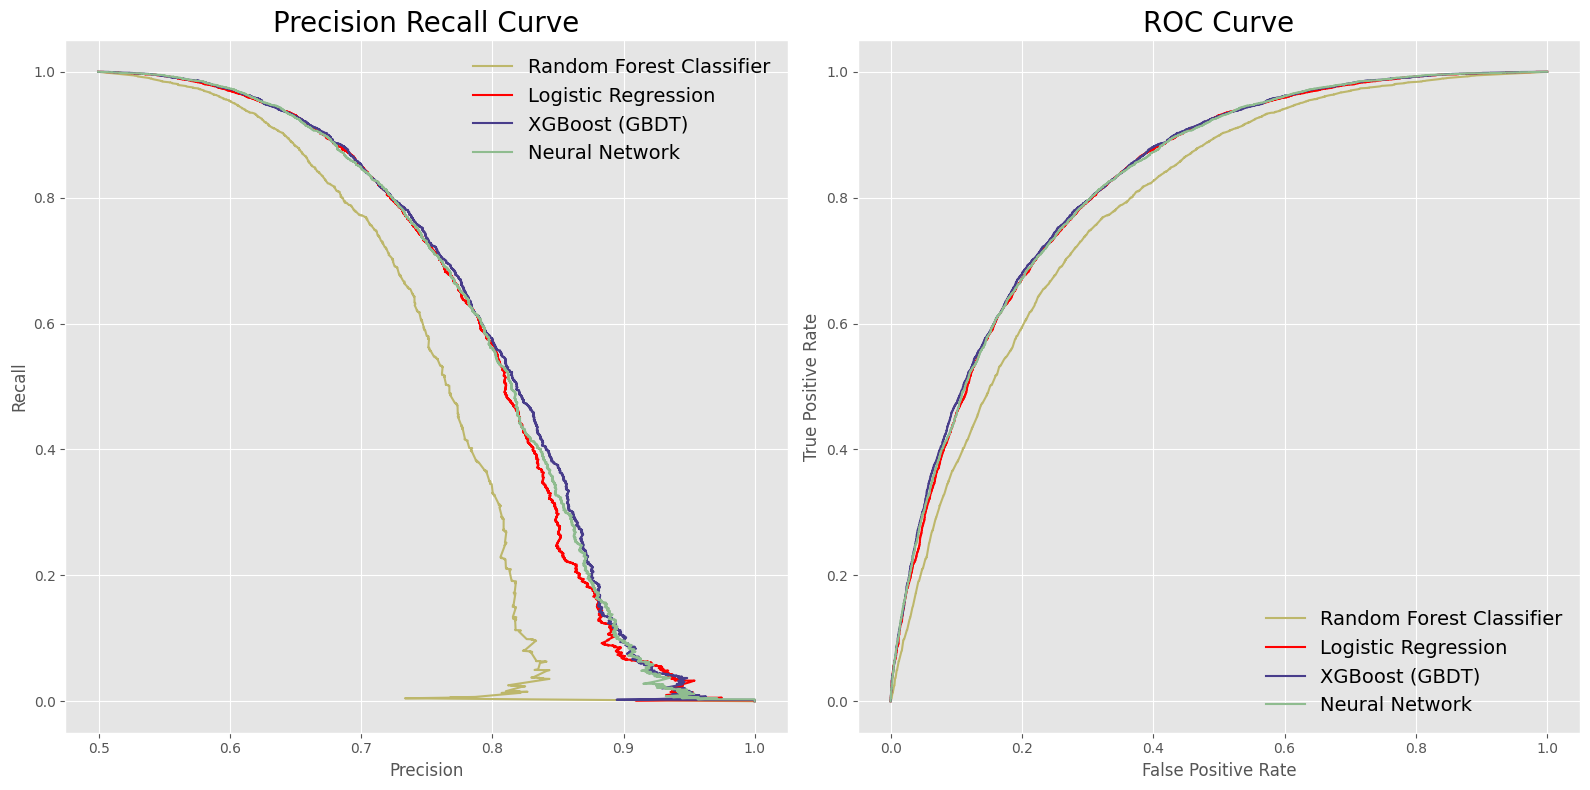

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
color_list = ['darkkhaki', 'red', 'darkslateblue', 'darkseagreen']

for model, name, color in zip(models, model_name, color_list):
    plotPrecisionRecallCurve(prc_dict[name][0], prc_dict[name][1], name, ax = ax1, color = color)
    plotROCCurve(roc_dict[name][0], roc_dict[name][1], name, ax = ax2, color = color)
ax1.legend(frameon = False, fontsize= 14)
ax1.set_title('Precision Recall Curve', fontsize = 20)
ax2.legend(frameon = False, fontsize= 14)
ax2.set_title('ROC Curve', fontsize = 20)


fig.tight_layout()

As shown in the graphs above, XGBoost also has the best performance:
1. Precision-Recall Curve is the most concave toward (1, 1)
   
2. ROC Curve is the most concave toward (0, 1)

Therefore, we choose XGBoost (GBDT) as our final model.

## Model Evaluation & Hyper Parameter Tuning

In [27]:
clf = GradientBoostingClassifier()
grid_params = {'n_estimators': [10, 50, 100, 250, 500], 
               'learning_rate': [0.0001, 0.001, 0.01, 0.1]}
grid_search = GridSearchCV(estimator = clf, param_grid = grid_params, scoring = 'recall', cv = 5).fit(X_train, y_train)

In [28]:
scores_params_dict = grid_search.cv_results_['params']
for i, score in enumerate(grid_search.cv_results_['mean_test_score']):
    scores_params_dict[i]['recall'] = score
scores_params_dict = pd.DataFrame(scores_params_dict).sort_values('recall', ascending = False)
scores_params_dict.iloc[0,:]

learning_rate      0.100000
n_estimators     500.000000
recall             0.791686
Name: 19, dtype: float64

In [29]:
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1).fit(X_train, y_train)

 -------------- Classification Report ---------------
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      6999
         1.0       0.73      0.79      0.76      6980

    accuracy                           0.75     13979
   macro avg       0.75      0.75      0.75     13979
weighted avg       0.75      0.75      0.75     13979

 ----------------------------------------------------


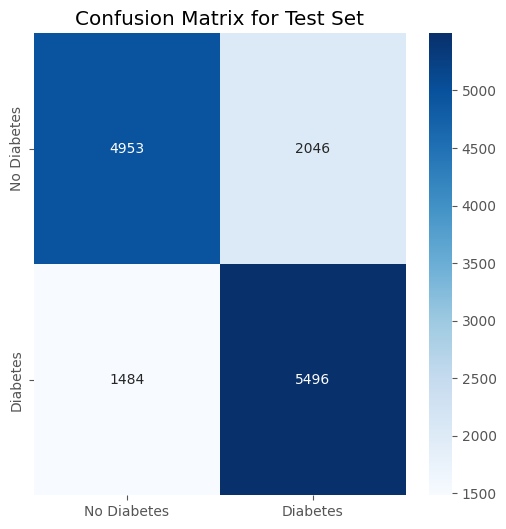

In [30]:
# Classification Report
print(' -------------- Classification Report ---------------')
print(classification_report(y_test, clf.predict(X_test)))
print(' ----------------------------------------------------')

# Confusion Matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
sns.heatmap(cm, annot= True, fmt = 'g', cmap = sns.color_palette("Blues", as_cmap=True), ax = ax);
ax.set_xticklabels(['No Diabetes', 'Diabetes']);
ax.set_yticklabels(['No Diabetes', 'Diabetes']);
ax.set_title('Confusion Matrix for Test Set');

In [31]:
# Save Cleaned Data for Final Model
X.reset_index().to_csv('cleaned_features.csv')
y.reset_index().to_csv('cleaned_target.csv')

We use n_estimators = 500, learning_rate = 0.1 to fit the final model.